# Data Analysis

Import libraries

In [207]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 

%matplotlib inline

Read in CSV after data cleaning 

In [208]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Citibike_data/df_ready_for_eda.csv')

In [209]:
pd.set_option("display.max_columns", 100)

In [123]:
df

,Unnamed: 0,date,station_id,tripduration,time,citi_station_name,citi_station_lat,citi_station_lon,citi_zipcode,PRCP,TAVG,dist_mta,train_name,train_lat,train_lon,landmark,landmark_lat,landmark_lon,dist_landmark,Median,Mean,Pop,rider,day,weekend
0,0,2019-08-01,3192,261.0,00:19:17.4780,Liberty Light Rail,40.711242,-74.055701,7302.0,0.0,79.0,0.022601,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.050212,76967.0500,98752.3753,31104.0,1,Thursday,0
1,1,2019-08-01,3186,172.0,00:25:59.1480,Grove St PATH,40.719586,-74.043117,7302.0,0.0,79.0,0.008522,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.038837,76967.0500,98752.3753,31104.0,1,Thursday,0
2,2,2019-08-01,3203,525.0,00:32:13.7000,Hamilton Park,40.727596,-74.044247,7302.0,0.0,79.0,0.008459,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.031166,76967.0500,98752.3753,31104.0,1,Thursday,0
3,3,2019-08-01,3185,219.0,00:36:15.2730,City Hall,40.717733,-74.043845,7302.0,0.0,79.0,0.010270,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.040780,76967.0500,98752.3753,31104.0,1,Thursday,0
4,4,2019-08-01,3272,262.0,00:45:49.3530,Jersey & 3rd,40.723332,-74.045953,7302.0,0.0,79.0,0.009749,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.035708,76967.0500,98752.3753,31104.0,1,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815627,815627,2020-08-31,3186,NaN,23:43:15.8540,Grove St PATH,40.719586,-74.043117,7302.0,0.0,72.0,0.008522,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.038837,76967.0500,98752.3753,31104.0,1,Monday,0
815628,815628,2020-08-31,3481,NaN,23:46:19.9130,York St,40.716490,-74.041050,7302.0,0.0,72.0,0.009485,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.041670,76967.0500,98752.3753,31104.0,1,Monday,0
815629,815629,2020-08-31,3195,NaN,23:47:16.8680,Sip Ave,40.730897,-74.063913,7306.0,0.0,72.0,0.002119,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.037914,41962.6158,56445.6062,55565.0,1,Monday,0
815630,815630,2020-08-31,3195,NaN,23:50:37.2650,Sip Ave,40.730897,-74.063913,7306.0,0.0,72.0,0.002119,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.037914,41962.6158,56445.6062,55565.0,1,Monday,0


In [6]:
df.shape

(815632, 25)

In [219]:
# Modfying zipcode to the correct format
df.citi_zipcode = df.citi_zipcode.astype(str)
df.citi_zipcode = df.citi_zipcode.apply(lambda x: x[0:5])
df.citi_zipcode = df.citi_zipcode.apply(lambda x: x.strip('.'))
df.citi_zipcode = df.citi_zipcode.apply(lambda x: '0'+ x if x.startswith('7') else x)

Dropping all NY Zipcodes

In [220]:
df = df[~df.citi_zipcode.str.startswith("1")]

In [134]:
df

,Unnamed: 0,date,station_id,tripduration,time,citi_station_name,citi_station_lat,citi_station_lon,citi_zipcode,PRCP,TAVG,dist_mta,train_name,train_lat,train_lon,landmark,landmark_lat,landmark_lon,dist_landmark,Median,Mean,Pop,rider,day,weekend
0,0,2019-08-01,3192,261.0,00:19:17.4780,Liberty Light Rail,40.711242,-74.055701,07302,0.0,79.0,0.022601,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.050212,76967.0500,98752.3753,31104.0,1,Thursday,0
1,1,2019-08-01,3186,172.0,00:25:59.1480,Grove St PATH,40.719586,-74.043117,07302,0.0,79.0,0.008522,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.038837,76967.0500,98752.3753,31104.0,1,Thursday,0
2,2,2019-08-01,3203,525.0,00:32:13.7000,Hamilton Park,40.727596,-74.044247,07302,0.0,79.0,0.008459,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.031166,76967.0500,98752.3753,31104.0,1,Thursday,0
3,3,2019-08-01,3185,219.0,00:36:15.2730,City Hall,40.717733,-74.043845,07302,0.0,79.0,0.010270,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.040780,76967.0500,98752.3753,31104.0,1,Thursday,0
4,4,2019-08-01,3272,262.0,00:45:49.3530,Jersey & 3rd,40.723332,-74.045953,07302,0.0,79.0,0.009749,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.035708,76967.0500,98752.3753,31104.0,1,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815627,815627,2020-08-31,3186,NaN,23:43:15.8540,Grove St PATH,40.719586,-74.043117,07302,0.0,72.0,0.008522,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.038837,76967.0500,98752.3753,31104.0,1,Monday,0
815628,815628,2020-08-31,3481,NaN,23:46:19.9130,York St,40.716490,-74.041050,07302,0.0,72.0,0.009485,Newport Station,40.7247,-74.0363,Paulus Hook Park,40.758,-74.0374,0.041670,76967.0500,98752.3753,31104.0,1,Monday,0
815629,815629,2020-08-31,3195,NaN,23:47:16.8680,Sip Ave,40.730897,-74.063913,07306,0.0,72.0,0.002119,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.037914,41962.6158,56445.6062,55565.0,1,Monday,0
815630,815630,2020-08-31,3195,NaN,23:50:37.2650,Sip Ave,40.730897,-74.063913,07306,0.0,72.0,0.002119,Journal Square,40.7327,-74.0628,Paulus Hook Park,40.758,-74.0374,0.037914,41962.6158,56445.6062,55565.0,1,Monday,0


AVG Daily Riders by Zipcode

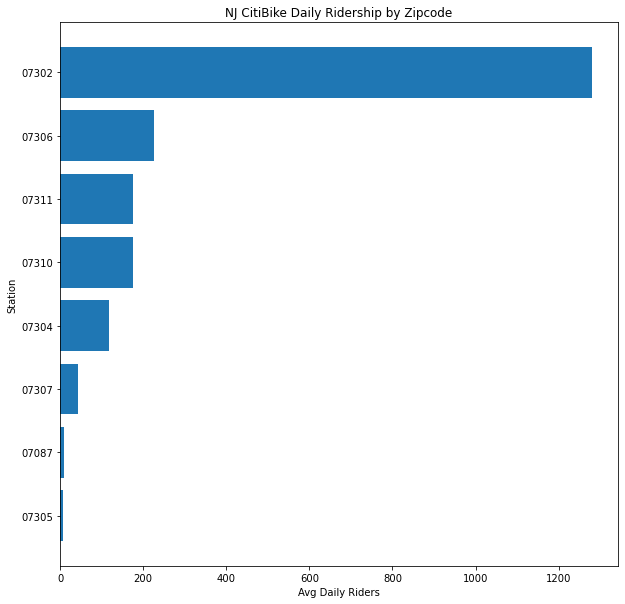

In [139]:
#avg daily riders by zip

Y1 = df.groupby(['citi_zipcode', 'date'])['rider'].sum().median(level='citi_zipcode').sort_values()
X1 = Y1.index

zip_figure1, ax2 = plt.subplots(figsize = (10,10))


ax2.barh(X1,Y1)
ax2.set_title('NJ CitiBike Daily Ridership by Zipcode')
ax2.set_xlabel('Avg Daily Riders')
ax2.set_ylabel('Station')


zip_figure1.set_facecolor('white')

plt.show() 


AVG Daily Riders by Median Income

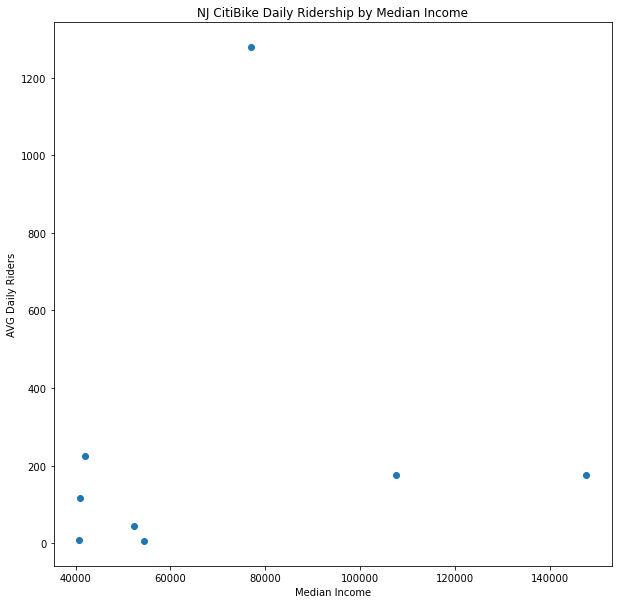

In [221]:
#avg daily riders by income

Y1 = df.groupby(['Median', 'date'])['rider'].sum().median(level='Median') 
X1 = Y1.index


fig, ax2 = plt.subplots(figsize = (10,10))


plt.scatter(X1,Y1)
plt.title('NJ CitiBike Daily Ridership by Median Income')
plt.xlabel('Median Income')
plt.ylabel('AVG Daily Riders')
fig.set_facecolor('white')
plt.show()

AVG Daily Riders by Citi Bike Station

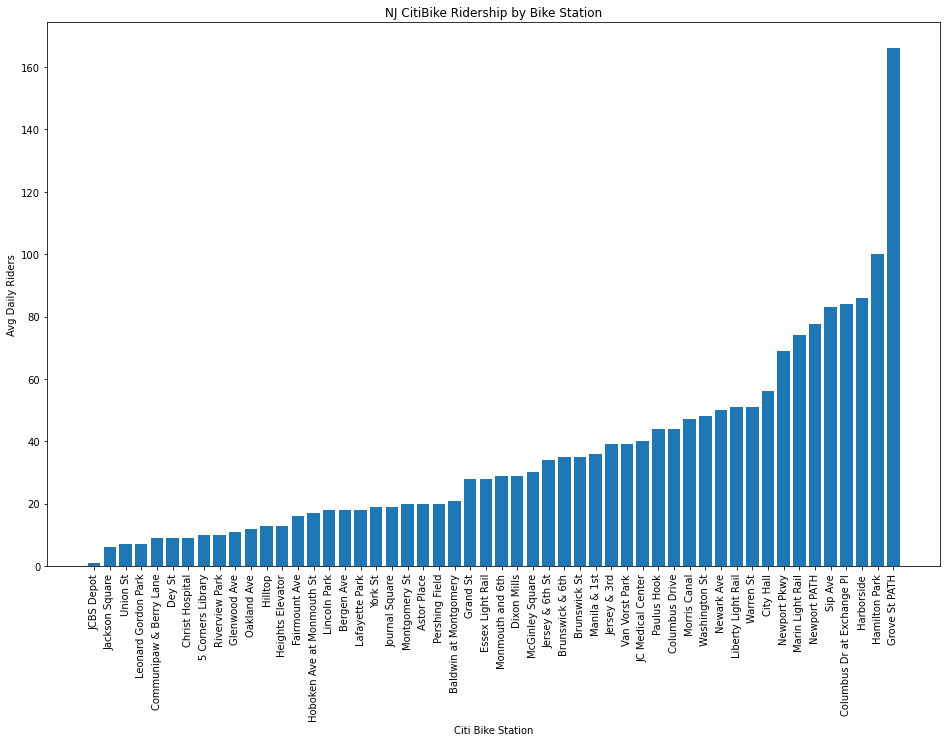

In [153]:
#ridership by bike station

Y2 = df.groupby(['citi_station_name', 'date'])['rider'].sum().sort_values().median(level='citi_station_name').sort_values()
X2 = Y2.index

fig, ax3 = plt.subplots(figsize = (16,10))


ax3.bar(X2,Y2)
ax3.set_title('NJ CitiBike Ridership by Bike Station')
ax3.set_xlabel('Citi Bike Station')
ax3.set_ylabel('Avg Daily Riders')
plt.xticks(rotation=90)

fig.set_facecolor('white')

plt.show() 

Distance to PATH by Station

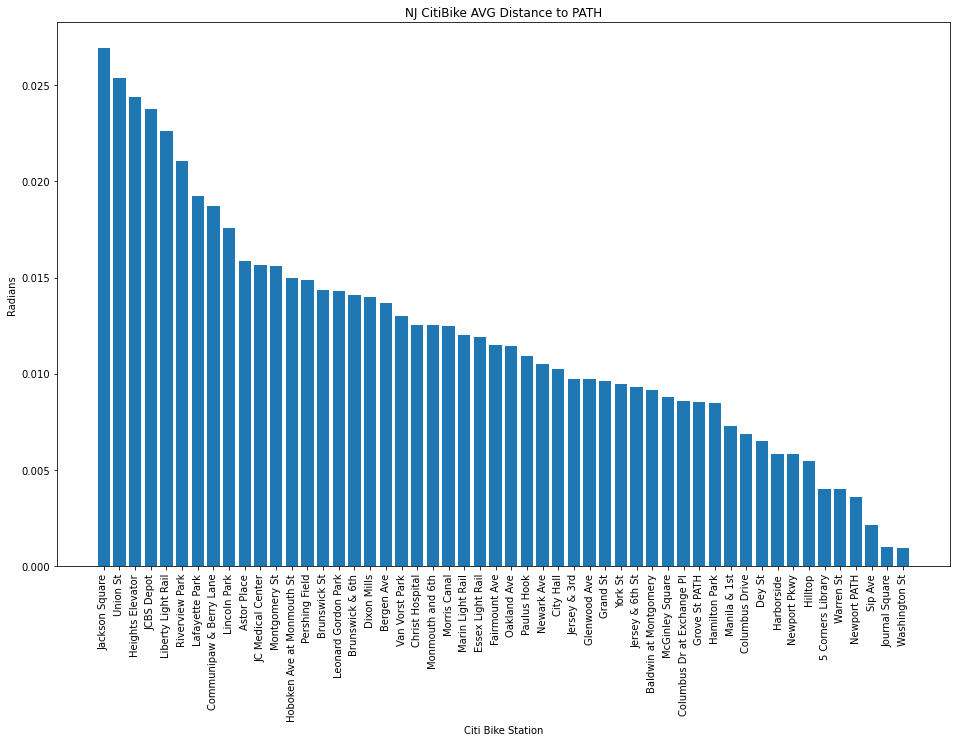

In [150]:
#Distance to PATH

Y2 = df.groupby(['citi_station_name'])['dist_mta'].mean().sort_values(ascending = False)
X2 = Y2.index

fig, ax3 = plt.subplots(figsize = (16,10))


ax3.bar(X2,Y2)
ax3.set_title('NJ CitiBike AVG Distance to PATH')
ax3.set_xlabel('Citi Bike Station')
ax3.set_ylabel('Radians')
fig.set_facecolor('white')
plt.xticks(rotation=90)

plt.show() 

Distance to Bikeable Landmark 

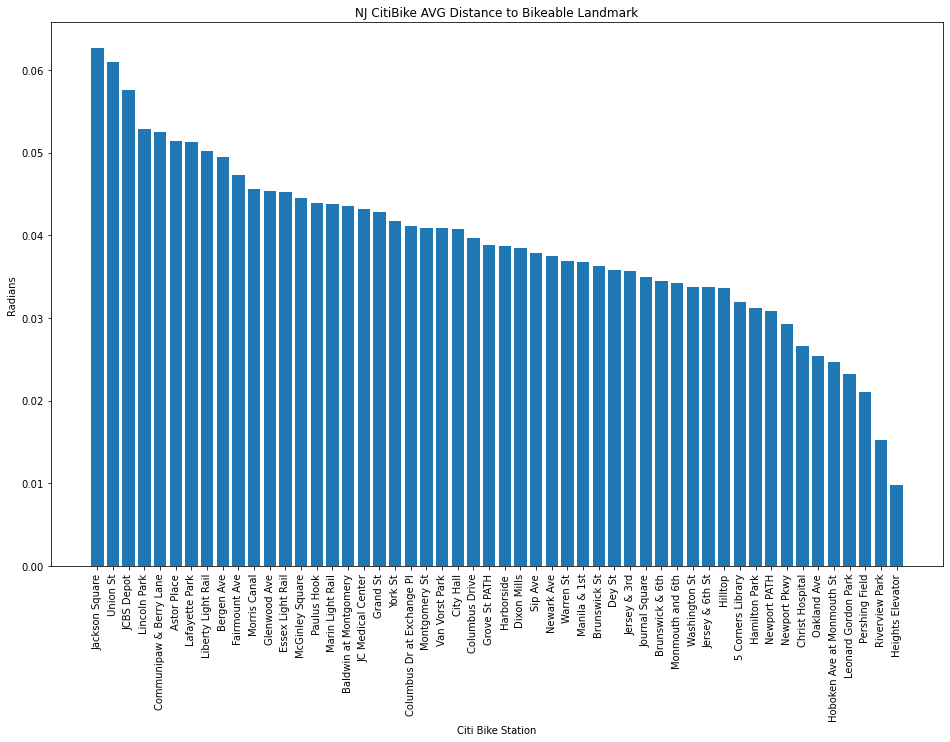

In [155]:
#Closest distanec to a bikeable landmark 

Y2 = df.groupby(['citi_station_name'])['dist_landmark'].mean().sort_values(ascending = False)
X2 = Y2.index

fig, ax3 = plt.subplots(figsize = (16,10))


ax3.bar(X2,Y2)
ax3.set_title('NJ CitiBike AVG Distance to Bikeable Landmark')
ax3.set_xlabel('Citi Bike Station')
ax3.set_ylabel('Radians')
fig.set_facecolor('white')
plt.xticks(rotation=90)

plt.show() 

Total Riders Over Time 

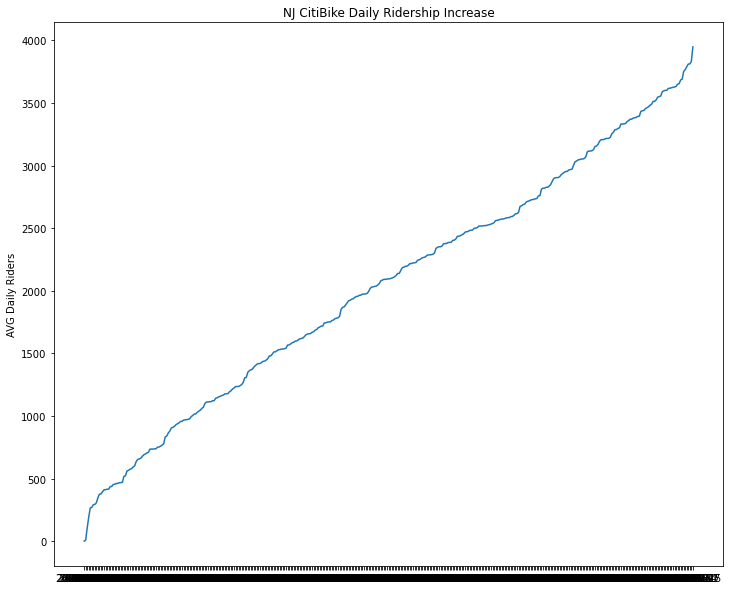

In [234]:
#AVG Daily riders over time

y = df.groupby(['date'])['rider'].sum().sort_values()
x = y.index


plt.subplots(figsize = (12,10))

plt.plot(x,y)
plt.title('NJ CitiBike Daily Ridership Increase')

plt.ylabel('AVG Daily Riders')


plt.show()

Riders by daily AVG temp

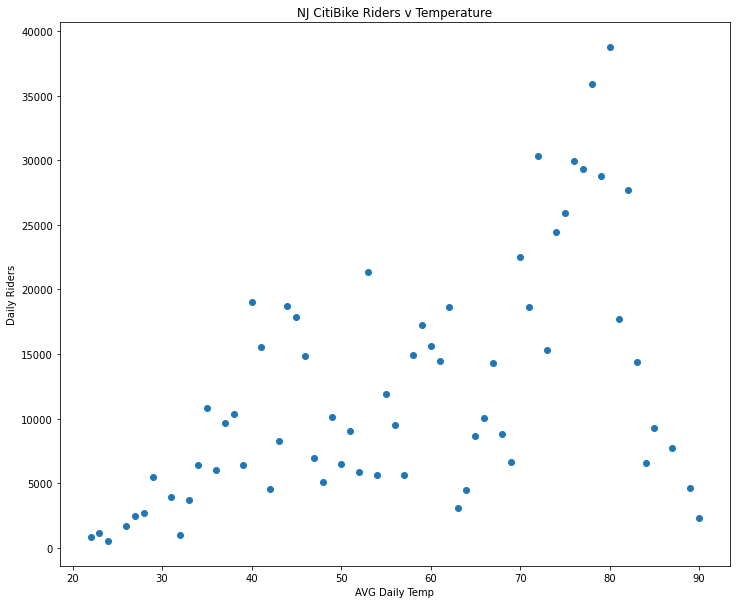

In [213]:
#total riders by daily temp avg

y = df.groupby(['TAVG'])['rider'].sum().sort_values()
x = y.index


fig, ax = plt.subplots(figsize = (12,10))

plt.scatter(x,y)
ax.set_title('NJ CitiBike Riders v Temperature')
ax.set_ylabel('Daily Riders')
ax.set_xlabel('AVG Daily Temp')
fig.set_facecolor('white')


plt.show()

Daily Riders vs. Precipitation

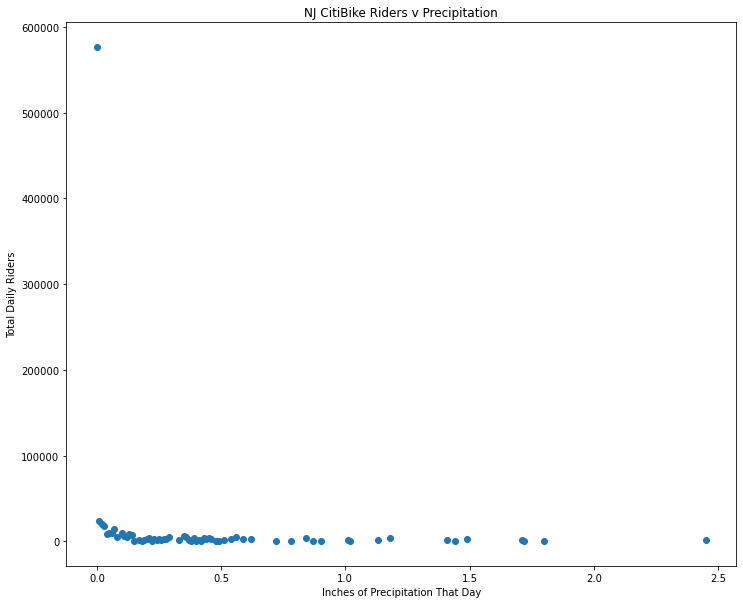

In [112]:
#total daily riders by precipitation 

y = df.groupby(['PRCP'])['rider'].sum().sort_values()
x = y.index


fig, ax = plt.subplots(figsize = (12,10))

plt.scatter(x,y)
ax.set_title('NJ CitiBike Riders v Precipitation')
ax.set_xlabel('Inches of Precipitation That Day')
ax.set_ylabel('Total Daily Riders')
fig.set_facecolor('white')

plt.show()

## Plot Citi Bike Stations & Path Stations

Read in Citi Bike Station locations

In [236]:
df = pd.read_csv('/Users/markdetiberiis/Desktop/Citibike_data/unique_station_zip_loc.csv')

In [237]:
df 

,Unnamed: 0,station_id,station_name,station_lat,station_lon,zipcode
0,0,3198,Heights Elevator,40.748716,-74.040443,7307
1,1,3280,Astor Place,40.719282,-74.071262,7304
2,2,3205,JC Medical Center,40.716540,-74.049638,7302
3,3,3281,Leonard Gordon Park,40.745910,-74.057271,7307
4,4,3277,Communipaw & Berry Lane,40.714358,-74.066611,7304
...,...,...,...,...,...,...
142,142,3196,Riverview Park,40.744319,-74.043991,7087
143,143,3640,Journal Square,40.733670,-74.062500,7306
144,144,3640,Journal Square,40.733670,-74.062500,7306
145,145,3191,Union St,40.718211,-74.083639,7304


In [160]:
# Modfying zipcode to the correct format
df.zipcode = df.zipcode.astype(str)
df.zipcode = df.zipcode.apply(lambda x: x[0:5])
df.zipcode = df.zipcode.apply(lambda x: x.strip('.'))
df.zipcode = df.zipcode.apply(lambda x: '0'+ x if x.startswith('7') else x)
df = df[~df.zipcode.str.startswith("1")]

In [161]:
df

,Unnamed: 0,station_id,station_name,station_lat,station_lon,zipcode
0,0,3198,Heights Elevator,40.748716,-74.040443,07307
1,1,3280,Astor Place,40.719282,-74.071262,07304
2,2,3205,JC Medical Center,40.716540,-74.049638,07302
3,3,3281,Leonard Gordon Park,40.745910,-74.057271,07307
4,4,3277,Communipaw & Berry Lane,40.714358,-74.066611,07304
...,...,...,...,...,...,...
142,142,3196,Riverview Park,40.744319,-74.043991,07087
143,143,3640,Journal Square,40.733670,-74.062500,07306
144,144,3640,Journal Square,40.733670,-74.062500,07306
145,145,3191,Union St,40.718211,-74.083639,07304


In [162]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

/Users/markdetiberiis/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
df.drop_duplicates(subset = 'station_id', inplace = True)

<ipython-input-35-8cd1ec618269>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset = 'station_id', inplace = True)


Read in PATH Station locations

In [189]:
df_path = pd.read_csv('/Users/markdetiberiis/Desktop/Citibike_data/PATH_stations.csv')

In [163]:
df.drop(['station_id', 'zipcode'], axis = 1, inplace = True)

In [188]:
df['group'] = 'citi'

<ipython-input-188-f1c0e7dec871>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [190]:
df_path.drop(['Line'],axis = 1, inplace = True)

In [191]:
df_path['group'] = 'PATH'

Make PATH column names similar to Citi Stations for merge

In [192]:
df_path.rename(columns = {'Station Name': 'station_name', 'Station Latitude': 'station_lat', 'Station Longitude': 'station_lon'}, inplace = True)

Merge Path and Citi locations

In [199]:
df = df.append(df_path)

In [233]:
df = df[~df.citi_zipcode.str.startswith("1")]

In [194]:
df.drop_duplicates(inplace = True)

<ipython-input-194-9ce7144259af>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [200]:
df.reset_index(inplace = True)

In [202]:
df.drop(['level_0', 'index'],axis = 1, inplace = True)

In [205]:
import plotly.express as px

token = 'pk.eyJ1IjoibWRldGliZXJpaXMwMSIsImEiOiJja2YxZTVzOGcwdWk5MnFsZTBuczIwaTBwIn0.qR6X2tKxDsJZttJMxDiOnQ'

px.set_mapbox_access_token(token)


px.scatter_mapbox(df[df.group == 'citi'],lat='station_lat',lon='station_lon',color='group')
px.scatter_mapbox(df[df.group == 'PATH'],lat='station_lat',lon='station_lon',color='group')

px.scatter_mapbox(df,lat='station_lat',lon='station_lon',color='group')


